In [1]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

In [2]:
DF = returnRawDFperBenchmark(Benchmark = "is", fix="Classes", benchmarkClass = ["A", "B", "C", "D"], FixedProcess = 64, Processes = [1,2,4,8,16,32,64,128,256], FixedBenchmarkClass="B")
DF

,1,2,4,8,16,32,64,128,256
Name,,,,,,,,,
.TAU_application,1.000000,1.0,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
MPI_Allreduce(),11.000000,11.0,11.00,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,11.000000
MPI_Alltoall(),11.000000,11.0,11.00,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,11.000000
MPI_Alltoallv(),11.000000,11.0,11.00,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,11.000000
MPI_Bcast(),1.000000,1.0,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
MPI_Comm_dup(),1.000000,1.0,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
MPI_Comm_rank(),1.000000,1.0,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
MPI_Comm_size(),1.000000,1.0,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
MPI_Finalize(),1.000000,1.0,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000


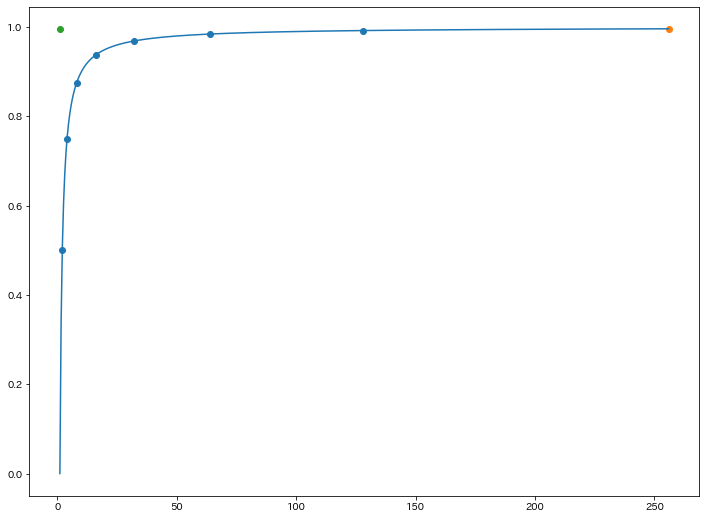

In [10]:
raw_x = DF.columns.tolist()
functionName = "MPI_Irecv()"
raw_y = [DF.at[functionName, x] for x in raw_x]

# グラフのプロット
fig = plt.figure(figsize=(12, 9))
## 実データをsklearn用に変形
raw_x = np.array(raw_x).reshape(-1,1)
raw_y = np.array(raw_y).reshape(-1, 1)
## 説明変数と目的変数に分割
notTrain_x, train_x, target_x = raw_x[0], raw_x[1:-1], raw_x[-1]
notTrain_y, train_y, target_y = raw_y[0], raw_y[1:-1], raw_y[-1]
## 実データをそれぞれプロット
plt.scatter(train_x, train_y, marker="o", label="予測に用いた関数コール回数")
plt.scatter(target_x, target_y, marker="o", label="予測したい関数コール回数の実測値")
plt.scatter(notTrain_x, notTrain_y, marker="o", label="最初のデータを除外した時に予測に用いなかった関数コール回数")
## モデル式をプロットするために変数”plot_x”を用意する
plot_x_min = 1.0
plot_x_max = 256.0
### モデル式としてプロットする最低値の設定
plot_x = np.linspace(plot_x_min, plot_x_max, 500)
plot_x = np.array(plot_x).reshape(-1, 1)
## モデルを [1 - 1/n] として計算
plot_y = 1 - 1/plot_x
plt.plot(plot_x, plot_y)

In [8]:
raw_x

array([[  1],
       [  2],
       [  4],
       [  8],
       [ 16],
       [ 32],
       [ 64],
       [128],
       [256]])

In [9]:
raw_y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])